In [8]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians

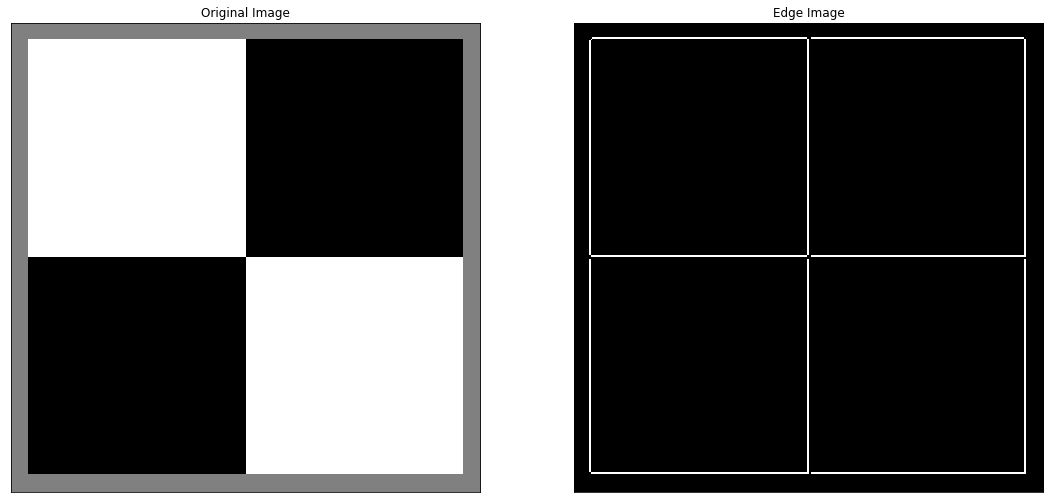

In [9]:
#task 1
img = cv2.imread('input/ps1-input0.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

(116, 0)
(608, 90)
(234, 0)
(490, 90)
(353, 0)
(371, 90)


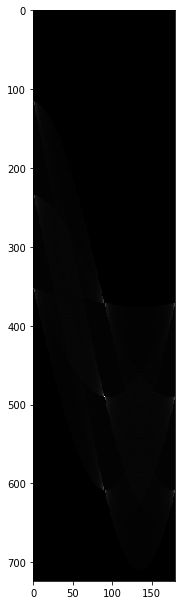

line: (245, 0) (245, 256)
line: (8, 0) (8, 256)
line: (0, 246) (256, 246)
line: (127, 0) (127, 256)
line: (0, 128) (256, 128)
line: (0, 9) (256, 9)


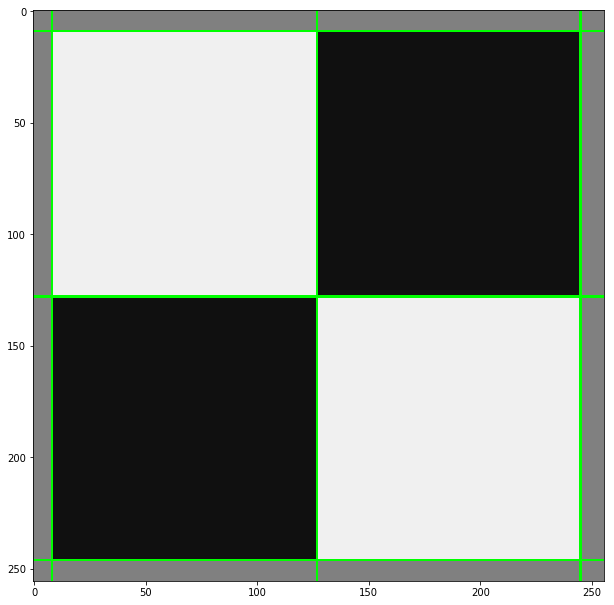

In [37]:
# task2

def find_lines(img, num_lines, close_angle=10, close_dist=10):
    theta_bins = 180
    d_bins = int(2*(img.shape[0] ** 2 + img.shape[1] ** 2) ** 0.5)
    acc = np.zeros((d_bins, theta_bins))

    def bin_to_theta(bin): return (bin / theta_bins - 0.5) * 180.0
    def bin_to_d(bin, shape): return bin - int(shape[0]**2 + shape[1]**2)**0.5
    def d_to_bin(d, shape): return d + int((shape[0]**2 + shape[1]**2)**0.5)
    
    edges = cv2.Canny(img,100,200)
    
    for x, y in np.transpose(np.nonzero(edges)):
        for theta in range(theta_bins):
            t = bin_to_theta(theta)

            c = cos(radians(t))
            s = sin(radians(t))
            d = int(round(c * (x + 1) + s * (y + 1)))

            dbin = d_to_bin(d, img.shape) 
            acc[dbin, theta] += 1

    peaks = set()
    for i in range(num_lines):
        largest = 0
        largest_ind = (-1,-1)
        for x in range(acc.shape[0]):
            for y in range(acc.shape[1]):
                theta = bin_to_theta(y)
                d = x
                if acc[x,y] <= largest: continue
                close_to_peak = False
                for p in peaks:
                    tp = bin_to_theta(p[1])
                    dp = p[0]
                    if abs(dp - d) < close_dist and min(abs(theta - tp), abs(theta - 180 - tp)) < close_angle:
                        close_to_peak = True
                if not close_to_peak:
                    largest = acc[x,y]
                    largest_ind = (x, y)
        if largest > 0:
            print(largest_ind)
            peaks.add(largest_ind)
    
    peaks = [(bin_to_d(x, img.shape), radians(bin_to_theta(y))) for (x,y) in peaks]
    
    return peaks, acc



def draw_lines(img, peaks):
    for d, theta in peaks:
        c = cos(theta)
        s = sin(theta)
        
        def xfromy(y):
            return (d - y * s) / c

        def yfromx(x):
            return (d - x * c) / s
        
        if (abs(c) > abs(s)):
            p1 = (int(xfromy(0)), 0)
            p2 = (int(xfromy(256)), 256)
        else:
            p1 = (0, int(yfromx(0)))
            p2 = (256, int(yfromx(256)))
        print("line: {} {}".format(p1, p2))
        cv2.line(img, p1, p2, (0,255,0))


peaks, acc = find_lines(img, 6)

# show accumulator array
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(acc, cmap='gray')
plt.show()



img1 = cv2.imread('input/ps1-input0.png')
draw_lines(img1, peaks)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(img1)
plt.show()
